# Reinforcement Q-learning simple NN as function approximation

- portfolio grid of size 10 (0 to 1)
- 1 hidden neural layers 
- Improved by Dropout 

In [2]:
# Initialization
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.read_csv('data.csv') #Three stocks (R,X_s,X_b,s_nom,s_pe,s_spr) 

In [3]:
data = pd.read_excel('sim_data_CER.xlsx') #Three stocks (R,X_s,X_b) Without predictors

# Initialization of the Tensorflow placeholders and the network

In [10]:
num_lags = 3
num_stocks=3
num_inputvar = (num_lags+1)*num_stocks
num_actions=10
hidden1 = 60
hidden2 = 45
hidden3 = 20

#Initialize Neural Network and set-up the placeholders
tf.reset_default_graph()
NN_input = tf.placeholder(shape=[1,num_inputvar],dtype=tf.float32)
# w1 = tf.Variable(tf.random_uniform([num_inputvar,hidden1],0,1))
# w2 = tf.Variable(tf.random_uniform([hidden1,hidden2],0,1))
# w3 = tf.Variable(tf.random_uniform([hidden2,hidden3],0,1))
# w4 = tf.Variable(tf.random_uniform([hidden3,num_actions],0,1))
# b1 = tf.Variable(np.zeros((1,hidden1)), dtype=tf.float32)
# b2 = tf.Variable(np.zeros((1,hidden2)), dtype=tf.float32)
# b3 = tf.Variable(np.zeros((1,hidden3)), dtype=tf.float32)
# b4 = tf.Variable(np.zeros((1,num_actions)), dtype=tf.float32)

w1 = tf.Variable(tf.random_uniform([num_inputvar,num_actions],0,0.01))

# h1 = tf.add(tf.matmul(NN_input,w1),b1)
# # h_drop1 = tf.nn.dropout(h1,0.5)
# a1 = tf.nn.softmax(h1)

# h2 = tf.add(tf.matmul(a1,w2),b2)
# # h_drop2 = tf.nn.dropout(h2,0.3)
# a2 = tf.nn.softmax(h2)

# h3 = tf.add(tf.matmul(a2,w3),b3)
# # h_drop3 = tf.nn.dropout(h3,0.1)
# a3 = tf.nn.softmax(h3)

# ol = tf.add(tf.matmul(a3,w4),b4)
# output = tf.nn.softmax(ol)

output = tf.matmul(NN_input,w1)
A_Max = tf.argmax(output,1)

Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(Q_Next - output))
learning_rate = tf.placeholder(tf.float32, shape=[])
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optmzr = trainer.minimize(loss)


# A_Max = tf.argmax(output,1)
# Calculate loss for the NN from the Q values
# Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
# diff = tf.subtract(Q_Next,output)
# loss = tf.reduce_sum(tf.multiply(diff,diff))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(a4 * tf.log(Q_Next), reduction_indices=[1]))
# optmzr = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
A = np.linspace(0,1,num_actions) # portfolio weights of stocks (1-weight) is the weight in the bonds

# Training of the NN function approximation

1974-05-01 00:00:00


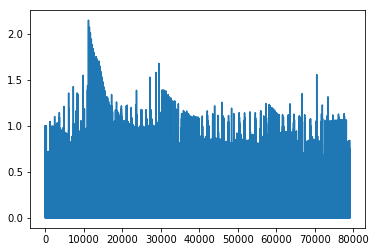

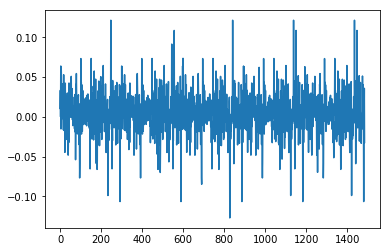

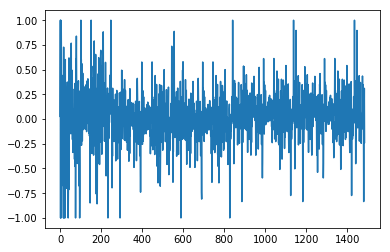

1.33980295712
[ 0.          0.          0.          0.          0.          0.33333333
  0.88888889  0.66666667  0.66666667  0.88888889  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.          0.33333333
  0.88888889  0.88888889  0.66666667  0.66666667  0.88888889  0.66666667
  0.77777778  0.66666667  0.88888889  0.88888889  0.66666667  0.66666667
  0.66666667  0.66666667  0.          0.88888889  0.66666667  0.
  0.88888889  0.88888889  0.          0.88888889  0.66666667  0.
  0.33333333  0.          0.          0.77777778  0.44444444  0.          0.
  0.77777778  0.66666667  1.          0.88888889  0.77777778  0.66666667
  0.          0.88888889  0.77777778  0.66666667]
Writing away results
1974-06-01 00:00:00


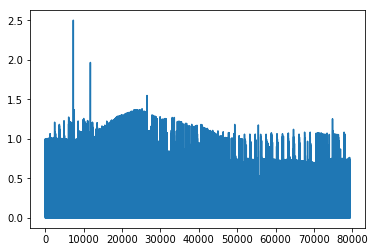

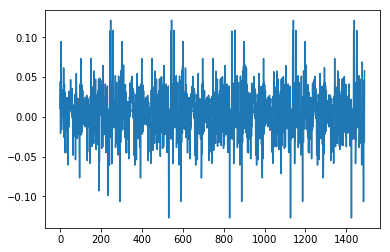

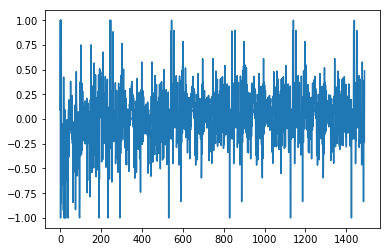

1.29258861962
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556
  0.88888889  0.88888889  0.55555556  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.77777778  0.77777778  0.55555556
  0.88888889  0.66666667  0.55555556  0.88888889  0.66666667  0.88888889
  0.66666667  0.55555556  0.88888889  0.66666667  0.88888889  0.88888889
  0.88888889  0.88888889  0.66666667  0.66666667  0.77777778  0.88888889
  0.88888889  0.88888889  0.88888889  0.66666667  0.          0.66666667
  0.          0.          0.66666667  0.77777778  0.          0.88888889
  0.88888889  0.66666667  1.          0.88888889  0.55555556  0.66666667
  0.          0.88888889  1.          0.66666667  1.        ]
Writing away results
1974-07-01 00:00:00


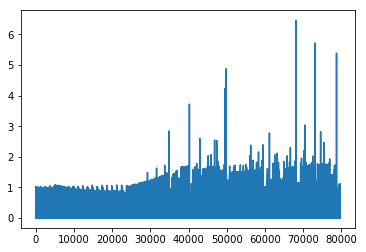

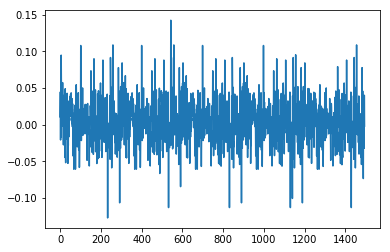

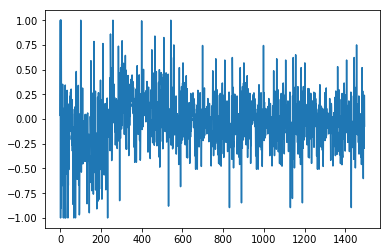

1.43400228315
[ 0.          0.          1.          1.          0.11111111  0.          1.
  0.77777778  0.55555556  1.          0.44444444  0.77777778  1.
  0.66666667  1.          0.66666667  0.77777778  0.77777778  0.66666667
  0.88888889  0.88888889  1.          0.66666667  1.          0.88888889
  0.88888889  1.          0.88888889  0.66666667  1.          0.88888889
  0.66666667  1.          0.11111111  0.66666667  1.          0.88888889
  0.66666667  1.          0.11111111  0.66666667  0.88888889  0.66666667
  1.          1.          0.88888889  0.88888889  0.88888889  1.
  0.88888889  0.88888889  0.22222222  1.          0.22222222  0.88888889
  0.88888889  1.          0.88888889  0.66666667]
Writing away results
1974-08-01 00:00:00


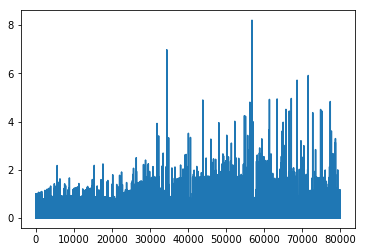

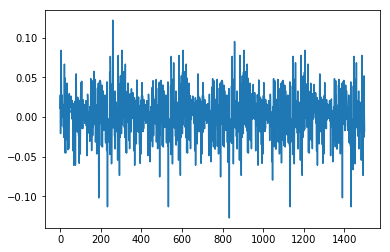

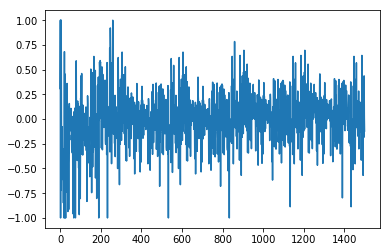

1.26446107196
[ 0.22222222  0.22222222  1.          0.88888889  0.66666667  0.55555556
  0.88888889  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.22222222  1.          0.88888889  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  1.          0.88888889
  0.55555556  0.55555556  0.88888889  0.55555556  1.          0.88888889
  0.55555556  0.22222222  1.          0.22222222  1.          0.88888889
  0.55555556  0.22222222  0.22222222  1.          0.88888889  0.22222222
  0.22222222  1.          0.88888889  0.88888889  0.55555556  0.55555556
  0.88888889  0.55555556  0.22222222  0.22222222  1.          0.88888889
  0.88888889  1.          0.88888889  0.55555556  1.        ]
Writing away results
1974-09-01 00:00:00


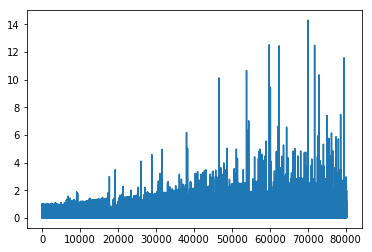

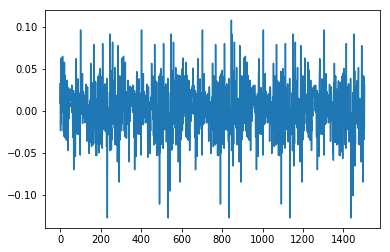

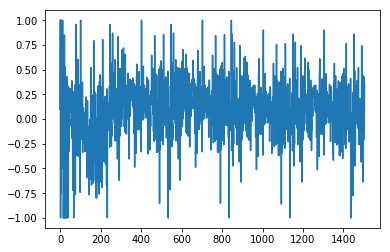

1.44529290291
[ 0.11111111  1.          0.11111111  0.66666667  0.88888889  0.66666667
  0.66666667  0.88888889  0.66666667  0.66666667  0.66666667  0.88888889
  0.11111111  1.          1.          0.66666667  0.88888889  0.66666667
  0.66666667  0.88888889  0.88888889  0.88888889  0.66666667  0.66666667
  0.88888889  0.66666667  0.88888889  1.          0.66666667  0.88888889
  0.88888889  0.11111111  0.11111111  1.          0.66666667  0.66666667
  0.88888889  0.11111111  0.88888889  1.          0.11111111  0.88888889
  1.          1.          0.66666667  0.66666667  0.88888889  1.
  0.66666667  0.11111111  0.88888889  1.          1.          0.66666667
  0.88888889  1.          0.66666667  0.88888889  1.        ]
Writing away results
1974-10-01 00:00:00


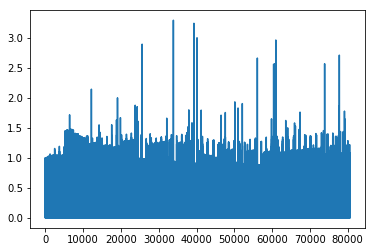

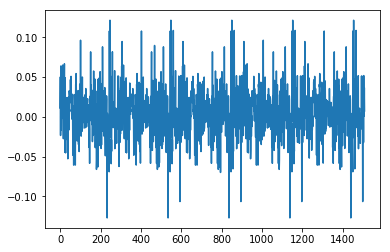

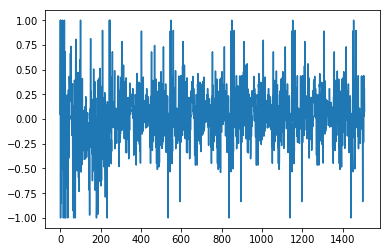

1.39947492604
[ 0.88888889  0.88888889  0.88888889  1.          0.88888889  1.          1.
  1.          1.          1.          1.          0.66666667  0.88888889
  0.88888889  0.88888889  1.          1.          1.          1.          1.
  1.          0.88888889  0.88888889  1.          0.88888889  1.          1.
  0.88888889  1.          0.66666667  0.          0.          1.
  0.88888889  0.88888889  1.          0.          0.66666667  0.
  0.88888889  0.66666667  0.66666667  0.88888889  0.88888889  1.          1.
  1.          0.88888889  0.77777778  0.66666667  0.66666667  0.88888889
  0.88888889  1.          1.          0.88888889  1.          0.
  0.88888889]
Writing away results
1974-11-01 00:00:00


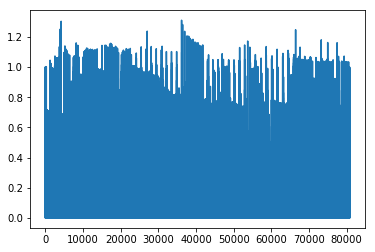

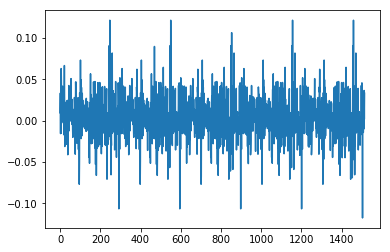

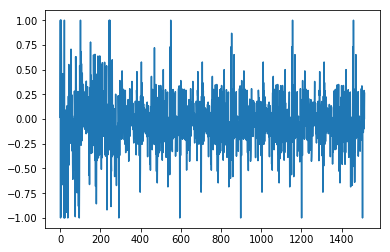

1.32189077032
[ 1.          0.88888889  0.66666667  1.          0.66666667  0.66666667
  0.66666667  0.88888889  0.88888889  0.66666667  0.77777778  0.11111111
  1.          0.66666667  0.66666667  1.          0.66666667  0.66666667
  0.88888889  0.66666667  1.          0.88888889  0.66666667  0.66666667
  0.66666667  0.66666667  0.          0.66666667  0.55555556  0.11111111
  0.          0.66666667  0.          0.66666667  0.55555556  0.
  0.55555556  0.          0.          0.55555556  0.55555556  1.          1.
  0.88888889  0.66666667  1.          0.88888889  0.77777778  0.55555556
  0.          1.          0.88888889  0.66666667  0.66666667  0.88888889
  0.66666667  0.66666667  0.88888889  0.66666667]
Writing away results
1974-12-01 00:00:00


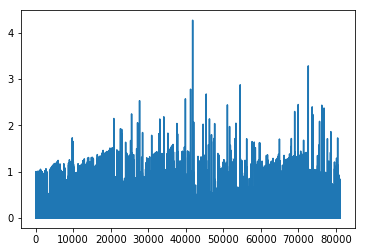

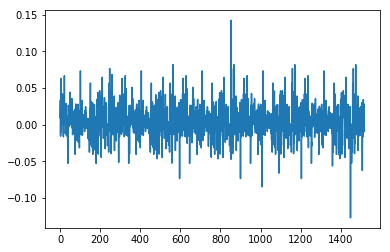

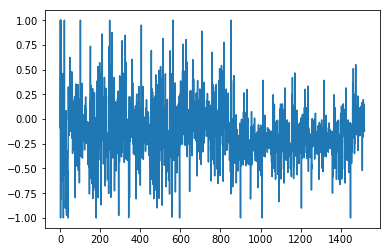

1.38354278706
[ 1.          0.88888889  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.33333333  0.33333333  0.11111111
  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556
  0.66666667  0.11111111  0.55555556  0.66666667  0.11111111  0.55555556
  0.66666667  0.11111111  0.55555556  0.33333333  0.33333333  0.33333333
  0.66666667  0.11111111  0.55555556  0.33333333  0.33333333  0.33333333
  0.11111111  0.55555556  0.33333333  0.33333333  0.11111111  0.11111111
  0.55555556  0.66666667  0.66666667  0.55555556  0.          0.33333333
  0.33333333  0.11111111  0.55555556  0.66666667  0.66666667  0.55555556
  0.66666667  0.11111111  0.55555556  0.66666667  0.        ]
Writing away results
1975-01-01 00:00:00


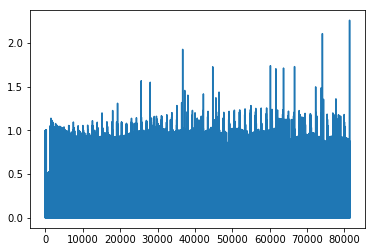

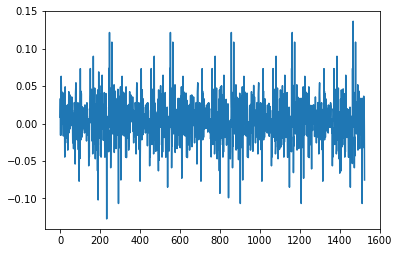

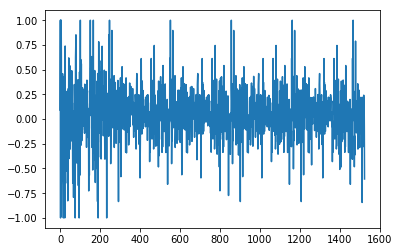

1.33567707558
[ 0.66666667  0.88888889  0.88888889  0.66666667  0.66666667  0.88888889
  0.88888889  0.66666667  0.44444444  0.          0.          0.88888889
  0.66666667  0.88888889  0.88888889  0.66666667  0.88888889  0.66666667
  0.88888889  0.88888889  0.66666667  0.88888889  0.88888889  0.66666667
  0.88888889  0.88888889  0.44444444  0.33333333  0.          0.66666667
  0.88888889  0.88888889  0.66666667  0.          0.66666667  0.          0.
  1.          0.44444444  0.88888889  0.88888889  0.88888889  0.66666667
  0.66666667  0.88888889  0.77777778  1.          0.          0.88888889
  0.55555556  0.66666667  0.66666667  0.88888889  0.66666667  0.88888889
  0.88888889  0.55555556  0.77777778  0.66666667]
Writing away results
1975-02-01 00:00:00


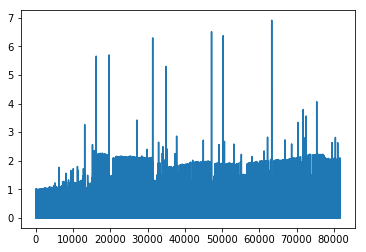

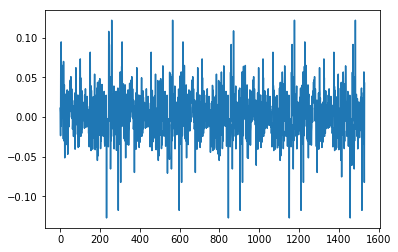

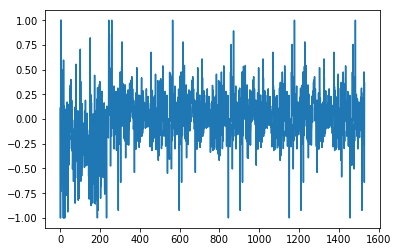

1.17150315138
[ 0.77777778  1.          1.          1.          1.          1.
  0.66666667  0.33333333  0.33333333  1.          1.          1.          1.
  1.          1.          0.66666667  1.          1.          0.66666667
  1.          0.22222222  0.66666667  1.          0.22222222  0.66666667
  0.33333333  0.33333333  0.33333333  1.          1.          0.66666667
  0.33333333  0.33333333  0.66666667  0.22222222  0.22222222  0.66666667
  0.33333333  1.          1.          0.66666667  1.          1.          1.
  0.22222222  0.33333333  0.33333333  1.          0.22222222  0.66666667
  1.          0.66666667  1.          1.          1.          1.
  0.22222222  0.33333333  0.33333333]
Writing away results
1975-03-01 00:00:00


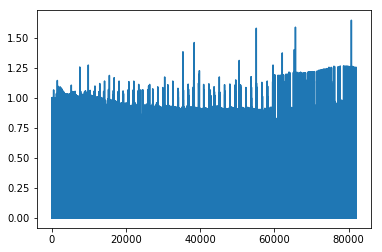

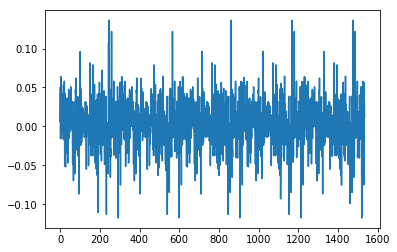

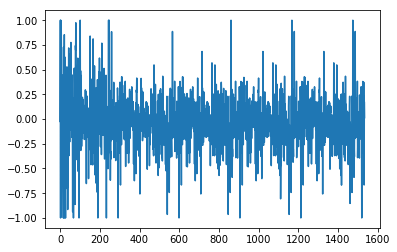

1.23917231478
[ 1.          0.88888889  1.          1.          1.          0.88888889
  0.77777778  0.11111111  0.          1.          0.88888889  1.          1.
  0.88888889  0.88888889  0.66666667  1.          1.          1.          1.
  1.          1.          1.          0.66666667  0.88888889  0.77777778
  0.22222222  1.          1.          1.          0.88888889  0.77777778
  0.88888889  0.          0.77777778  0.88888889  0.33333333  0.66666667
  1.          1.          0.88888889  0.66666667  1.          0.77777778
  0.88888889  0.          1.          1.          0.88888889  0.66666667
  1.          0.66666667  1.          1.          0.66666667  0.77777778
  0.66666667  0.          0.55555556]
Writing away results
1975-04-01 00:00:00


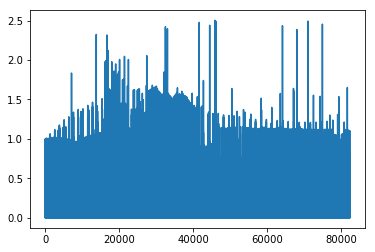

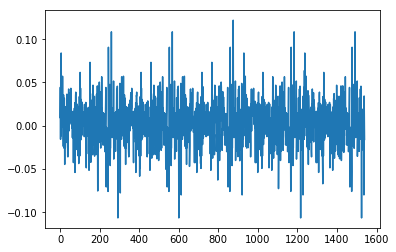

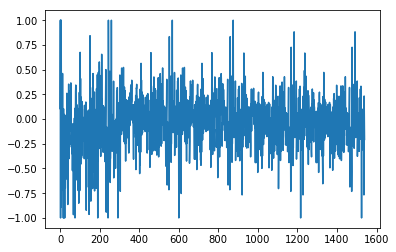

0.995553914897
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.55555556
  0.66666667  0.66666667  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.22222222  0.88888889  0.66666667  0.88888889  0.88888889
  0.66666667  0.88888889  0.88888889  0.66666667  0.22222222  0.55555556
  0.66666667  0.77777778  0.66666667  0.66666667  0.22222222  0.55555556
  0.77777778  0.55555556  0.66666667  0.22222222  0.55555556  0.55555556
  0.66666667  0.66666667  0.88888889  0.88888889  0.66666667  0.88888889
  0.55555556  0.55555556  0.55555556  0.66666667  0.          0.66666667
  0.88888889  0.22222222  0.55555556  0.88888889  0.66666667  0.88888889
  0.22222222  0.55555556  0.11111111  0.66666667  0.66666667]
Writing away results
1975-05-01 00:00:00


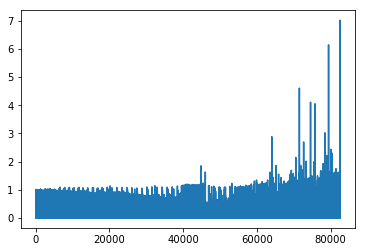

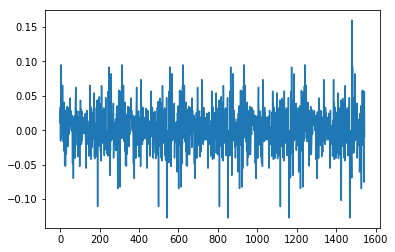

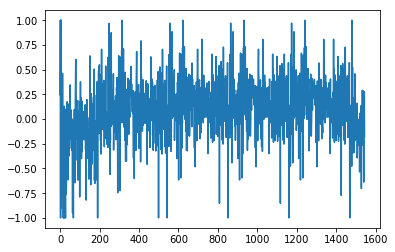

1.1112728971
[ 1.          1.          1.          0.66666667  0.77777778  0.77777778
  0.77777778  1.          0.66666667  0.55555556  1.          0.66666667
  0.44444444  0.66666667  1.          1.          0.66666667  1.
  0.66666667  1.          0.          0.66666667  0.77777778  0.88888889
  1.          0.66666667  0.77777778  0.66666667  0.33333333  0.33333333
  0.          0.          0.          0.33333333  0.          1.          1.
  0.66666667  0.66666667  1.          0.66666667  0.33333333  0.33333333
  0.          1.          1.          0.66666667  1.          0.66666667
  0.66666667  1.          0.66666667  1.          0.33333333  0.66666667
  1.          1.          1.          0.33333333]
Writing away results
1975-06-01 00:00:00


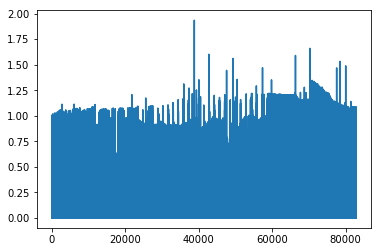

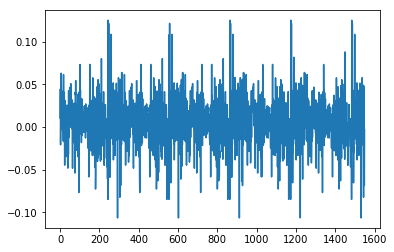

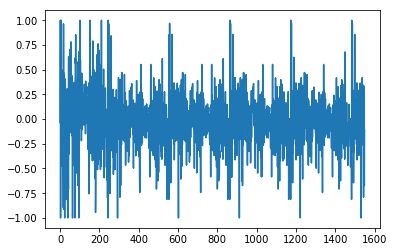

1.39168218929
[ 0.88888889  0.88888889  0.66666667  0.77777778  0.33333333  0.33333333
  0.88888889  0.66666667  0.88888889  0.88888889  0.66666667  1.
  0.66666667  0.88888889  0.88888889  0.66666667  0.88888889  0.88888889
  0.88888889  0.88888889  0.66666667  0.66666667  0.          0.
  0.88888889  0.88888889  0.88888889  0.66666667  0.          0.66666667
  0.          0.          0.66666667  0.66666667  0.88888889  0.88888889
  0.88888889  0.66666667  1.          0.88888889  0.77777778  0.66666667
  0.          0.88888889  0.88888889  0.66666667  0.66666667  0.88888889
  0.66666667  0.88888889  0.88888889  1.          0.77777778  0.66666667
  1.          1.          0.          0.          0.88888889]
Writing away results
1975-07-01 00:00:00


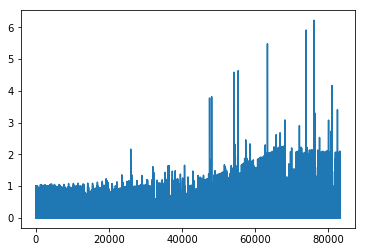

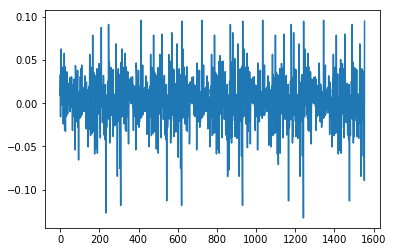

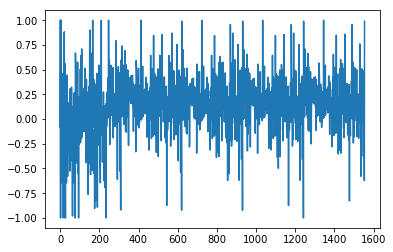

1.19018000004
[ 1.          0.66666667  0.88888889  0.77777778  0.77777778  1.
  0.66666667  0.77777778  0.66666667  0.66666667  1.          0.66666667
  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.          0.66666667  0.          0.          0.          0.66666667
  0.66666667  0.66666667  0.88888889  0.          0.33333333  0.33333333
  0.          0.88888889  0.33333333  0.33333333  0.66666667  0.66666667
  0.88888889  0.66666667  0.66666667  0.          0.88888889  0.33333333
  0.33333333  0.66666667  0.88888889  0.66666667  0.66666667  0.88888889
  0.66666667  0.66666667  0.66666667  0.          0.88888889  0.33333333
  0.33333333  0.88888889  0.          0.88888889  0.33333333]
Writing away results
1975-08-01 00:00:00


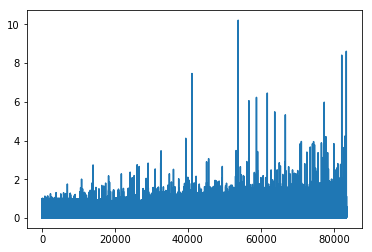

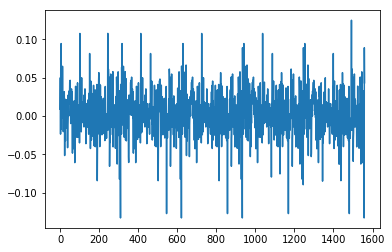

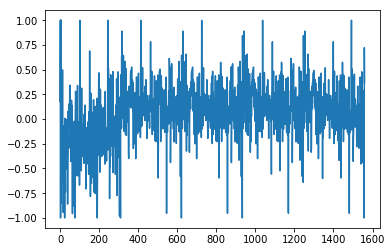

0.974563977626
[ 1.          0.11111111  0.11111111  0.66666667  0.44444444  1.          1.
  1.          1.          0.44444444  1.          0.66666667  0.44444444
  1.          0.66666667  0.44444444  1.          0.66666667  0.44444444
  0.11111111  0.22222222  0.11111111  1.          0.66666667  0.44444444
  0.11111111  0.11111111  0.22222222  0.66666667  0.44444444  0.11111111
  0.22222222  0.66666667  1.          1.          1.          1.          1.
  0.11111111  0.11111111  0.22222222  0.66666667  1.          1.          1.
  0.44444444  1.          0.66666667  1.          1.          0.11111111
  0.22222222  0.66666667  0.66666667  1.          0.11111111  0.11111111
  0.22222222  0.66666667]
Writing away results
1975-09-01 00:00:00


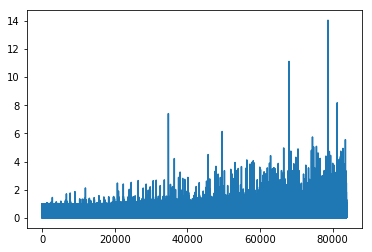

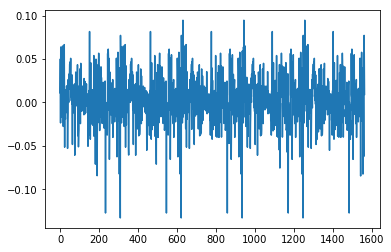

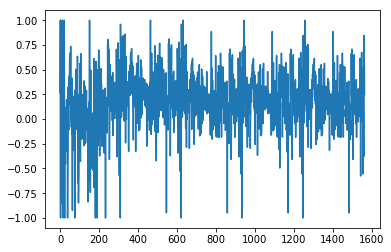

1.00958901715
[ 0.33333333  0.11111111  0.11111111  0.44444444  1.          1.          1.
  1.          0.44444444  1.          0.11111111  0.44444444  1.
  0.11111111  0.44444444  1.          0.11111111  0.44444444  0.33333333
  0.11111111  0.11111111  0.11111111  0.11111111  0.44444444  0.33333333
  0.33333333  0.11111111  0.11111111  0.44444444  0.33333333  0.11111111
  0.11111111  1.          1.          1.          1.          1.
  0.33333333  0.33333333  0.11111111  0.11111111  1.          1.          1.
  0.44444444  1.          0.11111111  1.          1.          0.44444444
  0.33333333  0.11111111  0.11111111  1.          0.33333333  0.33333333
  0.11111111  0.44444444  1.        ]
Writing away results
1975-10-01 00:00:00


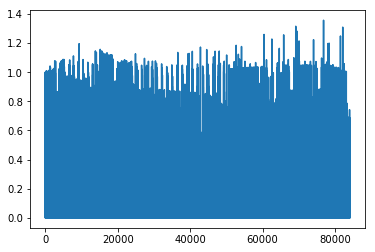

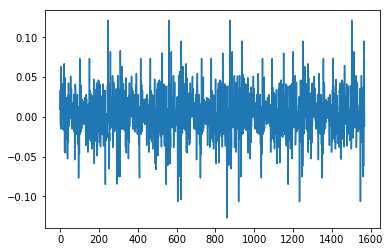

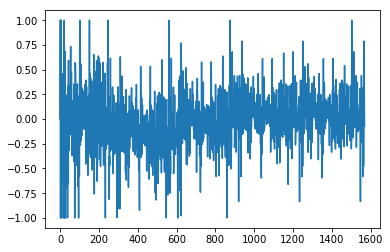

1.23684939402
[ 0.33333333  1.          0.88888889  0.66666667  1.          0.88888889
  0.66666667  0.88888889  0.66666667  1.          0.88888889  0.66666667
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.
  0.11111111  0.88888889  0.88888889  0.88888889  0.88888889  0.77777778
  0.11111111  0.55555556  0.11111111  0.11111111  0.77777778  0.          1.
  1.          0.66666667  0.66666667  0.66666667  0.88888889  0.77777778
  0.66666667  0.11111111  0.88888889  0.77777778  0.66666667  0.66666667
  0.88888889  0.66666667  0.66666667  0.88888889  0.66666667  0.77777778
  0.66666667  0.11111111  0.11111111  0.55555556  0.22222222  0.66666667
  0.88888889  0.88888889  0.88888889  0.55555556]
Writing away results
1975-11-01 00:00:00


KeyboardInterrupt: 

In [20]:
# initialize
init = tf.global_variables_initializer()
startepsilon = 0.8
endepsilon = 0.01
startlr = 0.8
endlr = 0.01
startgamma = 0.01
endgamma = 0.8
TWlist = []
Index = []
MWeights = []
Turnover = []
chooserlist = []
RU = []
learningrateQ = 0.01
n = 707
periods = 60
epochs = 5     # preferred to have a low amount of epochs because otherwise the the same data is used multiple times (usually not the case in stock returns)

# data parsing
dates = data['Date']
mdata = data[['r','xs','xb']]
mdata.index = pd.DatetimeIndex(dates)

# include the lags
for i in range(1,num_lags+1):  # 1 till 11
    mdata['r_lag' + str(i)] = mdata['r'].shift(i)
    mdata['xs_lag' + str(i)] = mdata['xs'].shift(i)
    mdata['xb_lag' + str(i)] = mdata['xb'].shift(i)

mdata.drop(mdata.head(num_lags).index, inplace=True)
# have a look at the data (if not include NANs)
# print(mdata)

# Train the the Q-function DNN
with tf.Session() as sess:
    for i in range(240,int(n-periods-1)):
        lostlist = []
        OptimalWeights = np.zeros(periods-1)
        currentK = 0
        print(mdata.index[i])
        rmin = -1
        rmax = 1
        sess.run(init) # initialize the Neural Network again
        
        while currentK < periods - 1:
            epsilon = 0.15
            lr = 0.1
            gamma = 0.98
            currentEpoch = 0
            rlist = []  
            runitlist = []
            
            while currentEpoch < epochs:
#                 if(currentEpoch > 0):
#                     epsilon -= (startepsilon-endepsilon)/epochs
#                     lr -= (startlr-endlr)/epochs
#                     gamma += (startgamma-endgamma)/epochs
                indexes = np.asarray(range(i+currentK-1))   
                #Training of the Q-Network for the data available (with Neural Nets) 
                for j in indexes:
                    s = mdata.iloc[j,:].values.reshape(1,num_inputvar)
                    #Choose an action by greedily (with e chance of random action) from the Q-network
                    a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
                    a = A[a_int]  # -1 because index
                    if np.random.rand(1) < epsilon:
                        a = random.choice(A)

                    #Get new state and reward from environment
                    s1 = mdata.iloc[j+1,:].values.reshape(1,num_inputvar)
                    r = (a*s1[0][1] + (1-a)*s1[0][2]) #reward: this is now the wealth gained from this step, but could be other rewards like utility
                    rlist.append(r)
                    Q = sess.run(output,feed_dict={NN_input:s1})
                    
                    #Obtain maxQ' and set our target value for chosen action.
                    Q1 = np.max(Q)
                    targetQ = allQ
                    if(len(rlist)>1):
                        rmin = np.min(rlist)
                        rmax = np.max(rlist)
                    runit = -1 + 2*((r -rmin)/(rmax-rmin))
#                     targetQ[0,int(a*(num_actions-1))] = targetQ[0,int(a*(num_actions-1))] + learningrateQ*(runit + gamma*Q1 - targetQ[0,int(a*(num_actions-1))]) 
                    targetQ[0,int(a*(num_actions-1))] = runit + gamma*Q1
                    runitlist.append(runit)
                    #Train the neural network using target and predicted Q values
                    opt,W1,loss_ = sess.run([optmzr,w1,loss],feed_dict={NN_input:s,Q_Next:targetQ,learning_rate:lr})
                    lostlist.append(loss_)
                currentEpoch += 1
            
            # After training now calculate the optimal weights for the K=60 periods to come
            s = mdata.iloc[i+currentK,:].values.reshape(1,num_inputvar)
            a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
            aOpt = A[a_int]
            OptimalWeights[currentK] = aOpt
            currentK += 1
            
        # For insight purposes (Write away)
        plt.ion()
        plt.plot(lostlist)
        plt.show()
        plt.plot(rlist)
        plt.show()
        plt.plot(runitlist)
        plt.show()
        
        firstdiff = OptimalWeights[1:] - OptimalWeights[:-1]
        MWeights.append(np.mean(OptimalWeights))
        TerminalWealth = np.exp(sum(OptimalWeights*mdata[i+1:i+currentK+1]['xs'] + (1-OptimalWeights)*mdata[i+1:i+currentK+1]['xb']))
        TWlist.append(TerminalWealth)
        Index.append(mdata.index[i])
        Turnover.append(sum(abs(firstdiff*np.exp(mdata[i+1:i+currentK]['xs'])) + abs((1-firstdiff)*np.exp(mdata[i+1:i+currentK]['xb']))))
        RU.append((1/(1-5))*pow(TerminalWealth,(1-5)))
        print(TerminalWealth)
        print(OptimalWeights)
        
        print('Writing away results')
        df = pd.DataFrame({'index date':Index,'TW':TWlist, 'Mean Weights Xs':MWeights,'Turnover':Turnover, 'Realized Utility':RU})
        df.to_excel('DNN_3(4)_indexesinloop.xlsx', sheet_name='sheet1', index=False)
print('Done!')
        